## Batting Analytics in the IPL

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Objectives:
* Analyze batting averages of players over different IPL seasons to identify trends and top performers.
* Compare strike rates of batsmen to determine most aggressive batsmen.
* Evaluate the impact of player nationality on performance.
* Rank batsmen based on different batting metrics like average, strike rate, consistency etc.
* To build an Classification model that can accurately categorize cricket players as Indian or Overseas based on their performance statistics.

### Data Description.
* Pos - The position of a player in a particular season based on total runs.
* Player - The name of the player.
* Mat - Total matches in which a player was included in the playing 11.
* Inns - The number of innings in which the batsman actually batted.
* NO - The number of times the batsman was not out at the conclusion of an innings they batted in.
* Runs - Total Runs scored in a particular season.
* HS - The highest score ever made by the batsman in the season.
* Avg - Batting Average - The total number of runs divided by the total number of innings in which the batsman was out. Ave = Runs/[I – NO] (also Avge or Avg.).
* BF - Balls Faced - The total number of balls received, including no-balls but not including wides.
* SR - Strike Rate - The average number of runs scored per 100 balls faced. (SR = [100 * Runs]/BF).
* 100 - Number of times 100 runs(centuries) scored by a player.
* 50 - Number of times 50 runs(half-centuries) scored by a player.
* 4s - Number of times a player hits a 4.
* 6s - Number of times a player hits a 6.
* Nationality - Whether the palyed is indian or overseas.
* Team - The team the player belongs to.
* Season - The year the record belongs to.


### Data Preparation and Cleaning

Let’s start by reading the csv file to Pandas DataFrame.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("C:/Users/lohithlikith/Documents/Datasets/Matches IPL/Matches.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POS          1046 non-null   int64  
 1   PLAYER       1046 non-null   object 
 2   Mat          1046 non-null   int64  
 3   Inns         1046 non-null   int64  
 4   NO           1046 non-null   int64  
 5   Runs         1046 non-null   int64  
 6   HS           1046 non-null   int64  
 7   Avg          1046 non-null   float64
 8   BF           1046 non-null   int64  
 9   SR           1046 non-null   float64
 10  100          1046 non-null   int64  
 11  50           1046 non-null   int64  
 12  4s           1046 non-null   int64  
 13  6s           1046 non-null   int64  
 14  Nationality  1046 non-null   object 
 15  Team         1046 non-null   object 
 16  Season       1046 non-null   int64  
dtypes: float64(2), int64(12), object(3)
memory usage: 139.1+ KB


In [4]:
df.describe()

,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Season
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,50.418738,10.341300,8.500000,1.815488,180.184512,47.032505,24.266233,138.721797,126.403929,0.050669,0.935946,16.647228,6.782027,2013.648184
std,28.882680,4.599059,4.519972,1.728287,160.612057,28.275895,14.468440,116.601296,28.186681,0.255681,1.430598,16.469802,7.718635,3.492238
min,1.000000,1.000000,1.000000,0.000000,8.000000,4.000000,0.000000,3.000000,47.360000,0.000000,0.000000,0.000000,0.000000,2008.000000
25%,26.000000,6.000000,4.000000,0.000000,47.000000,23.000000,14.100000,40.000000,109.532500,0.000000,0.000000,4.000000,1.000000,2011.000000
50%,50.000000,11.000000,8.000000,1.000000,125.000000,43.000000,22.500000,101.000000,124.325000,0.000000,0.000000,11.000000,4.000000,2014.000000
75%,75.000000,14.000000,13.000000,3.000000,282.000000,66.000000,31.175000,214.750000,140.245000,0.000000,1.000000,25.000000,9.000000,2017.000000
max,100.000000,19.000000,19.000000,10.000000,973.000000,175.000000,152.000000,640.000000,333.330000,4.000000,9.000000,88.000000,59.000000,2019.000000


In [5]:
df.columns

Index(['POS', 'PLAYER', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR',
       '100', '50', '4s', '6s', 'Nationality', 'Team', 'Season'],
      dtype='object')

Let’s view the unique values of each column to help us understand the dataset better.

In [6]:
for col in df:
    print(df[col].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
['David Warner' 'KL Rahul' 'Quinton de Kock' 'Shikhar Dhawan'
 'Andre Russell' 'Chris Gayle' 'Rishabh Pant' 'Virat Kohli' 'Shreyas Iyer'
 'Jonny Bairstow' 'AB de Villiers' 'Suryakumar Yadav' 'MS Dhoni'
 'Chris Lynn' 'Rohit Sharma' 'Hardik Pandya' 'Shane Watson'
 'Faf du Plessis' 'Ajinkya Rahane' 'Suresh Raina' 'Parthiv Patel'
 'Prithvi Shaw' 'Manish Pandey' 'Nitish Rana' 'Sanju Samson'
 'Mayank Agarwal' 'Steve Smith' 'Jos Buttler' 'Shubman Gill'
 'Ambati Rayudu' 'Robin Uthappa' 'Kieron Pollard' 'Dinesh Karthik'
 'Vijay Shankar' 'Moeen Ali' 'David Miller' 'Marcus Stoinis'
 'Colin Ingram'

In [7]:
# Classify column names based on dtypes

object_column_names = df.dtypes[df.dtypes.values == 'object'].index.tolist()
dff=print(object_column_names)

numerical_column_names = df.dtypes[df.dtypes.values != 'object'].index.tolist()
numerical_column_names

['PLAYER', 'Nationality', 'Team']


['POS',
 'Mat',
 'Inns',
 'NO',
 'Runs',
 'HS',
 'Avg',
 'BF',
 'SR',
 '100',
 '50',
 '4s',
 '6s',
 'Season']

In [8]:
numeric=pd.DataFrame(df[['Mat','Inns','NO','Runs','HS','BF','SR','4s','6s']])
numeric

,Mat,Inns,NO,Runs,HS,BF,SR,4s,6s
0,12,12,2,692,100,481,143.86,57,21
1,14,14,3,593,100,438,135.38,49,25
2,16,16,1,529,81,398,132.91,45,25
3,16,16,1,521,97,384,135.67,64,11
4,14,13,4,510,80,249,204.81,31,52
...,...,...,...,...,...,...,...,...,...
1041,4,2,1,26,25,27,96.29,2,0
1042,3,3,0,25,16,31,80.64,4,0
1043,8,4,1,25,23,22,113.63,2,1
1044,4,3,1,24,9,22,109.09,2,1


In [9]:
df.isnull().sum()

POS            0
PLAYER         0
Mat            0
Inns           0
NO             0
Runs           0
HS             0
Avg            0
BF             0
SR             0
100            0
50             0
4s             0
6s             0
Nationality    0
Team           0
Season         0
dtype: int64

In [10]:
df.head()


,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Nationality,Team,Season
0,1,David Warner,12,12,2,692,100,69.20,481,143.86,1,8,57,21,Overseas,Sunrisers Hyderabad,2019
1,2,KL Rahul,14,14,3,593,100,53.90,438,135.38,1,6,49,25,Indian,Kings Xi Punjab,2019
2,3,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25,Overseas,Mumbai Indians,2019
3,4,Shikhar Dhawan,16,16,1,521,97,34.73,384,135.67,0,5,64,11,Indian,Delhi Capitals,2019
4,5,Andre Russell,14,13,4,510,80,56.66,249,204.81,0,4,31,52,Overseas,Kolkata Knight Riders,2019


In [13]:
import plotly.express as px
import plotly.io as pio

fig = px.sunburst(df, path=['Nationality', 'Team','Season'], 
                  title='Pie Plot of Nationality, Team,Season')
fig.show()

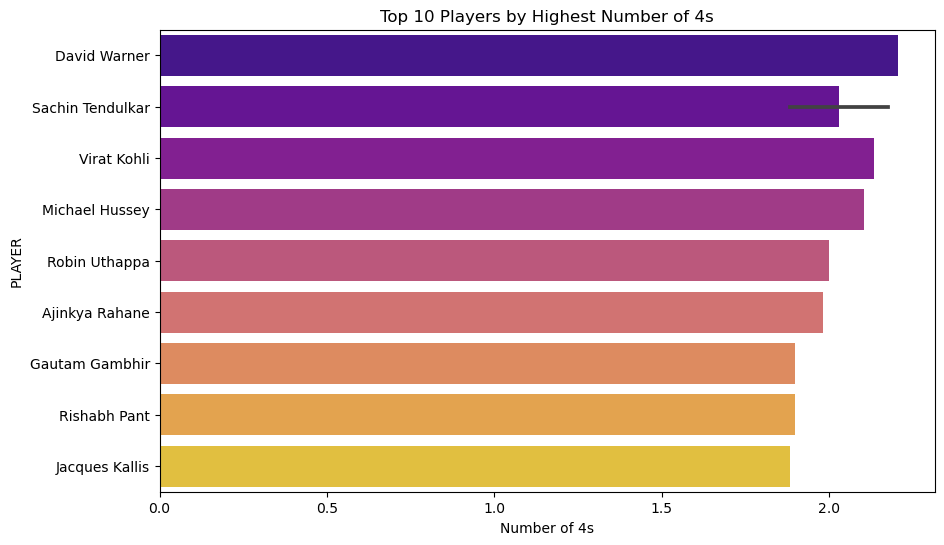

In [30]:
import seaborn as sns
# Sort batting_data by boundaries (sixes) in descending order and select top 10 players
top_boundaries = df.sort_values(by='4s', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='4s', y='PLAYER', data=top_boundaries, palette='plasma')
plt.xlabel('Number of 4s')
plt.ylabel('PLAYER')
plt.title('Top 10 Players by Highest Number of 4s')
plt.show()

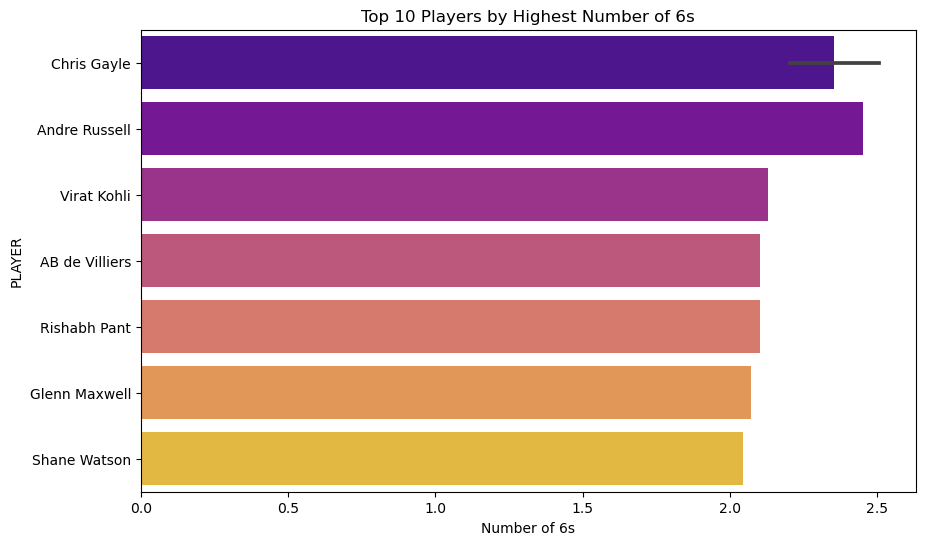

In [31]:
import seaborn as sns
# Sort batting_data by boundaries (sixes) in descending order and select top 10 players
top_boundaries = df.sort_values(by='6s', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='6s', y='PLAYER', data=top_boundaries, palette='plasma')
plt.xlabel('Number of 6s')
plt.ylabel('PLAYER')
plt.title('Top 10 Players by Highest Number of 6s')
plt.show()

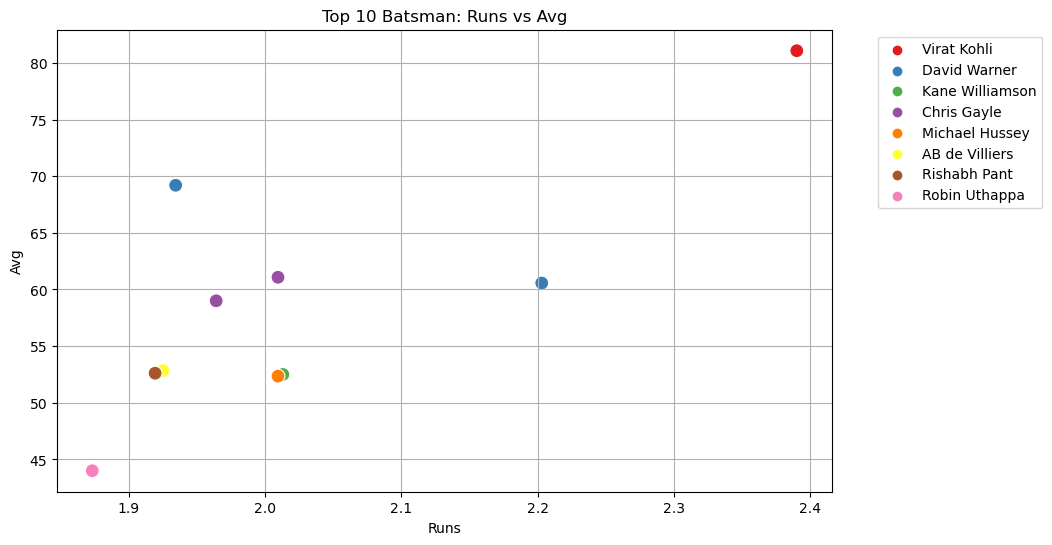

In [36]:
# Sort bowling_data by wickets taken in descending order and select top 10 players
top_batsman = df.sort_values(by='Runs', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runs', y='Avg', data=top_batsman, hue='PLAYER', palette='Set1', s=100)
plt.xlabel('Runs')
plt.ylabel('Avg')
plt.title('Top 10 Batsman: Runs vs Avg')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

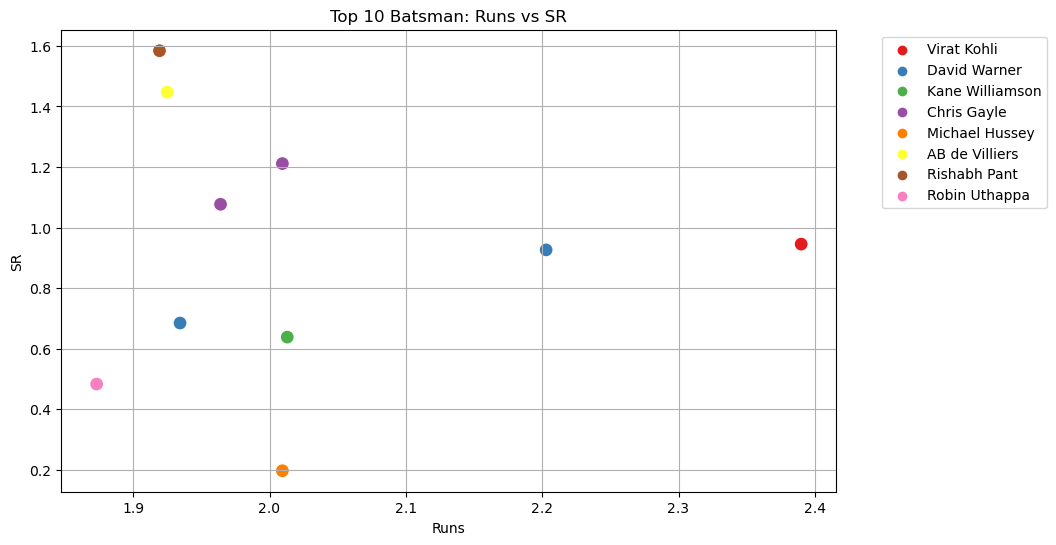

In [37]:
# Sort bowling_data by wickets taken in descending order and select top 10 players
top_batsman = df.sort_values(by='Runs', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runs', y='SR', data=top_batsman, hue='PLAYER', palette='Set1', s=100)
plt.xlabel('Runs')
plt.ylabel('SR')
plt.title('Top 10 Batsman: Runs vs SR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [15]:
# Assuming df is the dataframe
skewness = numeric.apply(lambda x: x.skew())
skewness

Mat    -0.258035
Inns    0.182776
NO      1.164372
Runs    1.127917
HS      0.659920
BF      0.992210
SR      1.035922
4s      1.319706
6s      2.038659
dtype: float64

In [16]:
from sklearn.preprocessing import PowerTransformer


# Select numerical columns for transformation
numerical_columns = ['NO','Runs','HS','BF','SR','4s','6s']

# Perform power transformation
pt = PowerTransformer(method='yeo-johnson',standardize = True)
df[numerical_columns] = pt.fit_transform(df[numerical_columns])

In [17]:
df[numerical_columns].skew()

NO     -0.002631
Runs   -0.065939
HS     -0.071462
BF     -0.068871
SR      0.020872
4s     -0.038614
6s     -0.003141
dtype: float64

In [18]:
import numpy as np

# Define outlier threshold multiplier (consider 1.5 for standard definition)
outlier_multiplier = 1.5

for column in numeric:
    # Calculate quartiles
    q1 = df[column].quantile(.25)  # First quartile (25th percentile)
    q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)

    # Calculate interquartile range (IQR)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - outlier_multiplier * iqr
    upper_bound = q3 + outlier_multiplier * iqr

    # Winsorization - Replace outliers with values at the specified quantiles
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    # Print information about outliers
    print(f"Column: {column}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print("-" * 30)

# Save the modified dataset (if applicable)
# df.to_csv("modified_dataset.csv", index=False)

Column: Mat
IQR: 8.0
Lower bound: -6.0
Upper bound: 26.0
------------------------------
Column: Inns
IQR: 9.0
Lower bound: -9.5
Upper bound: 26.5
------------------------------
Column: NO
IQR: 2.244768480958526
Lower bound: -4.744379343906491
Upper bound: 4.234694579927613
------------------------------
Column: Runs
IQR: 1.6998583922752166
Lower bound: -3.3934069367362962
Upper bound: 3.4060266323645703
------------------------------
Column: HS
IQR: 1.5745661738356551
Lower bound: -3.1649915622994853
Upper bound: 3.133273133043135
------------------------------
Column: BF
IQR: 1.697279633525107
Lower bound: -3.397048307271217
Upper bound: 3.392070226829211
------------------------------
Column: SR
IQR: 1.1231849788349977
Lower bound: -2.242286388196148
Upper bound: 2.250453527143843
------------------------------
Column: 4s
IQR: 1.5788511551874245
Lower bound: -3.13638511416062
Upper bound: 3.1790195065890785
------------------------------
Column: 6s
IQR: 1.646374581819285
Lower bound:

In [19]:
#Treating of Outliers
# Define outlier threshold multiplier (consider 1.5 for standard definition)
outlier_multiplier = 1.5

for column in numeric:
    # Calculate quartiles
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    # Calculate interquartile range (IQR)
    iqr = q3 - q1

    # Define lower and upper bounds
    lower_bound = q1 - outlier_multiplier * iqr
    upper_bound = q3 + outlier_multiplier * iqr

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Choose your preferred treatment method:

    # Option 1: Remove outliers (caution advised)
    # df = df.drop(outliers.index)

    # Option 2: Cap outliers to bounds
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

    # Option 3: Replace outliers with median/mean (consider carefully)
    df.loc[df[column] < lower_bound, column] = df[column].median()
    df.loc[df[column] > upper_bound, column] = df[column].median()

    # Print information about outliers
    print(f"Column: {column}")
    print(f"Number of outliers detected: {len(outliers)}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print("-" * 30)

# Save the modified dataset (if applicable)
# df.to_csv("modified_dataset.csv", index=False)

Column: Mat
Number of outliers detected: 0
IQR: 8.0
Lower bound: -6.0
Upper bound: 26.0
------------------------------
Column: Inns
Number of outliers detected: 0
IQR: 9.0
Lower bound: -9.5
Upper bound: 26.5
------------------------------
Column: NO
Number of outliers detected: 0
IQR: 2.244768480958526
Lower bound: -4.744379343906491
Upper bound: 4.234694579927613
------------------------------
Column: Runs
Number of outliers detected: 0
IQR: 1.6998583922752166
Lower bound: -3.3934069367362962
Upper bound: 3.4060266323645703
------------------------------
Column: HS
Number of outliers detected: 0
IQR: 1.5745661738356551
Lower bound: -3.1649915622994853
Upper bound: 3.133273133043135
------------------------------
Column: BF
Number of outliers detected: 0
IQR: 1.697279633525107
Lower bound: -3.397048307271217
Upper bound: 3.392070226829211
------------------------------
Column: SR
Number of outliers detected: 0
IQR: 1.1231849788349977
Lower bound: -2.242286388196148
Upper bound: 2.25045

In [20]:
import pandas as pd
from scipy.stats import ttest_ind


# Select 2 columns to test 
col1 = df['Runs']
col2 = df['SR']

# Perform t-test
tstat, pval = ttest_ind(col1, col2)

# Print results  
print('t-statistic:', tstat) 
print('p-value:', pval)

if pval < 0.05:
  print('Columns are dependent (reject null hypothesis)')
else:
  print('Columns are independent (fail to reject null hypothesis)')

t-statistic: 0.02212147378439398
p-value: 0.9823531687433212
Columns are independent (fail to reject null hypothesis)


In [21]:
import pandas as pd
from scipy.stats import ttest_ind

# Select 2 columns to test 
col1 = df['Runs']
col2 = df['Avg']

# Perform t-test
tstat, pval = ttest_ind(col1, col2)

# Print results  
print('t-statistic:', tstat) 
print('p-value:', pval)

if pval < 0.05:
  print('Columns are dependent (reject null hypothesis)')
else:
  print('Columns are independent (fail to reject null hypothesis)')

t-statistic: -54.11412997010781
p-value: 0.0
Columns are dependent (reject null hypothesis)


In [22]:
import pandas as pd
from scipy.stats import ttest_ind

# Select 2 columns to test 
col1 = df['Runs']
col2 = df['BF']

# Perform t-test
tstat, pval = ttest_ind(col1, col2)

# Print results  
print('t-statistic:', tstat) 
print('p-value:', pval)

if pval < 0.05:
  print('Columns are dependent (reject null hypothesis)')
else:
  print('Columns are independent (fail to reject null hypothesis)')

t-statistic: 1.4789948134104416e-14
p-value: 0.9999999999999882
Columns are independent (fail to reject null hypothesis)


In [23]:
import pandas as pd
from scipy.stats import ttest_ind

# Select 2 columns to test 
col1 = df['Runs']
col2 = df['HS']

# Perform t-test
tstat, pval = ttest_ind(col1, col2)

# Print results  
print('t-statistic:', tstat) 
print('p-value:', pval)

if pval < 0.05:
  print('Columns are dependent (reject null hypothesis)')
else:
  print('Columns are independent (fail to reject null hypothesis)')

t-statistic: 3.027863397533188e-15
p-value: 0.9999999999999976
Columns are independent (fail to reject null hypothesis)


In [24]:
import pandas as pd
from scipy.stats import ttest_ind


# Select 2 columns to test 
col1 = df['Runs']
col2 = df['4s']

# Perform t-test
tstat, pval = ttest_ind(col1, col2)

# Print results  
print('t-statistic:', tstat) 
print('p-value:', pval)

if pval < 0.05:
  print('Columns are dependent (reject null hypothesis)')
else:
  print('Columns are independent (fail to reject null hypothesis)')

t-statistic: 1.0267562418558054e-14
p-value: 0.9999999999999918
Columns are independent (fail to reject null hypothesis)


In [25]:
import pandas as pd
from scipy.stats import ttest_ind


# Select 2 columns to test 
col1 = df['Runs']
col2 = df['6s']

# Perform t-test
tstat, pval = ttest_ind(col1, col2)

# Print results  
print('t-statistic:', tstat) 
print('p-value:', pval)

if pval < 0.05:
  print('Columns are dependent (reject null hypothesis)')
else:
  print('Columns are independent (fail to reject null hypothesis)')

t-statistic: 1.498404194163859e-14
p-value: 0.999999999999988
Columns are independent (fail to reject null hypothesis)


In [26]:
numeric

,Mat,Inns,NO,Runs,HS,BF,SR,4s,6s
0,12,12,2,692,100,481,143.86,57,21
1,14,14,3,593,100,438,135.38,49,25
2,16,16,1,529,81,398,132.91,45,25
3,16,16,1,521,97,384,135.67,64,11
4,14,13,4,510,80,249,204.81,31,52
...,...,...,...,...,...,...,...,...,...
1041,4,2,1,26,25,27,96.29,2,0
1042,3,3,0,25,16,31,80.64,4,0
1043,8,4,1,25,23,22,113.63,2,1
1044,4,3,1,24,9,22,109.09,2,1


In [29]:
import pandas as pd
from scipy.stats import ttest_ind 


# List of columns to exclude 
exclude_cols = ['Season', '100', '50']  

# Get numeric columns excluding given columns
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=exclude_cols).columns

# Perform t-test on pairs of numeric columns
for i in range(len(num_cols)):
  for j in range(i+1, len(num_cols)):
    col1 = df[num_cols[i]]
    col2 = df[num_cols[j]]
    
    tstat, pval = ttest_ind(col1, col2)
    
    print(f'{num_cols[i]} vs {num_cols[j]}:') 
    print(f'  t-statistic: {tstat:.3f}')
    print(f'  p-value: {pval:.3f}')

    if pval < 0.05:
      print('Columns are dependent (reject H0)')
    else:
      print('Columns are independent (fail to reject H0)')

POS vs Mat:
  t-statistic: 44.319
  p-value: 0.000
Columns are dependent (reject H0)
POS vs Inns:
  t-statistic: 46.375
  p-value: 0.000
Columns are dependent (reject H0)
POS vs NO:
  t-statistic: 56.423
  p-value: 0.000
Columns are dependent (reject H0)
POS vs Runs:
  t-statistic: 56.423
  p-value: 0.000
Columns are dependent (reject H0)
POS vs HS:
  t-statistic: 56.423
  p-value: 0.000
Columns are dependent (reject H0)
POS vs Avg:
  t-statistic: 26.183
  p-value: 0.000
Columns are dependent (reject H0)
POS vs BF:
  t-statistic: 56.423
  p-value: 0.000
Columns are dependent (reject H0)
POS vs SR:
  t-statistic: 56.428
  p-value: 0.000
Columns are dependent (reject H0)
POS vs 4s:
  t-statistic: 56.423
  p-value: 0.000
Columns are dependent (reject H0)
POS vs 6s:
  t-statistic: 56.423
  p-value: 0.000
Columns are dependent (reject H0)
Mat vs Inns:
  t-statistic: 9.235
  p-value: 0.000
Columns are dependent (reject H0)
Mat vs NO:
  t-statistic: 71.061
  p-value: 0.000
Columns are depende

### Analyze batting averages of players over different IPL seasons to identify trends and top performers.

In [ ]:
import pandas as pd


# Keep 'PLAYER', 'Avg' and 'Season' columns 
df1 = df[['PLAYER', 'Avg', 'Season']] 

mean_avg_by_season = df1.groupby('Season').Avg.mean()

print(mean_avg_by_season)

# Sort by 'Avg' and print top 10 rows with 'PLAYER' and 'Avg' columns
print(df1.sort_values('Avg', ascending=False)[['PLAYER', 'Avg']].head(10))

mean_avg_by_season.plot()

### Compare strike rates of batsmen to determine most aggressive batsmen.

In [ ]:
import pandas as pd

data = df

# Calculate the strike rate for each player
data['Strike Rate'] = (data['Runs'] / data['BF']) * 100

# Sort the DataFrame by strike rate in descending order
sorted_data = data.sort_values(by='Strike Rate', ascending=False)

# Get the most aggressive batsman
most_aggressive_batsman = sorted_data.iloc[0]['PLAYER']

# Display the result
print("Most Aggressive Batsman:", most_aggressive_batsman)

### Rank batsmen based on different batting metrics like average, strike rate, consistency etc.

In [ ]:
# Importing necessary libraries
import pandas as pd

# Read the CSV file into a pandas DataFrame
data = df
# Extract relevant columns for ranking
columns = ['PLAYER', 'Avg', 'Strike Rate', 'Mat', 'Inns', 'Runs']

# Subset the data with relevant columns
subset_data = data[columns]

# Calculate additional metrics for ranking
subset_data['Consistency'] = subset_data['Runs'] / subset_data['Inns']
subset_data['Ranking Score'] = (subset_data['Avg'] * subset_data['Strike Rate']) / subset_data['Consistency']

# Sort the DataFrame by ranking score in descending order
sorted_data = subset_data.sort_values(by='Ranking Score', ascending=False)

# Display the ranked batsmen from Rank 1 to Rank 1000
print("Ranking of Batsmen:")
for i, row in sorted_data.head(1000).iterrows():
    print(f"Rank {i+1}: {row['PLAYER']} (Avg: {row['Avg']}, Strike Rate: {row['Strike Rate']}, Consistency: {row['Consistency']})")

### Evaluate the impact of player nationality on performance.

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
data = df

# Extract relevant columns for analysis
columns = ['PLAYER', 'Avg', 'Strike Rate', 'Nationality']

# Subset the data with relevant columns
subset_data = data[columns]

# Group data by nationality and calculate average batting average and strike rate
nationality_avg = subset_data.groupby('Nationality').agg({'Avg': 'mean', 'Strike Rate': 'mean'}).reset_index()

# Calculate the impact of nationality on performance
nationality_avg['Impact'] = nationality_avg['Avg'] + nationality_avg['Strike Rate']

# Sort the data by impact in descending order
sorted_data = nationality_avg.sort_values(by='Impact', ascending=False)

# Display the impact of nationality on performance
print("Impact of Nationality on Performance:")
for i, row in sorted_data.iterrows():
    print(f"{row['Nationality']}: {row['Impact']}")

### Develop a statistical model for match outcome prediction.

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = df

# Data preprocessing
# Add code for data preprocessing if needed

# Define features and target variable
X = data[['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s']]
y = data['Nationality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the model: {:.2f}".format(accuracy))

### SVM

In [ ]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

data = df

# Data preprocessing
# Add code for data preprocessing if needed

# Define features and target variable
X = data[['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s']]
y = data['Nationality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the model: {:.2f}".format(accuracy))

### Decision Trees

In [ ]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = df

# Data preprocessing
# Add code for data preprocessing if needed

# Define features and target variable
X = data[['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s']]
y = data['Nationality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the model: {:.2f}".format(accuracy))

### Linear Regression

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = df

# Select the features (independent variables) and target variable (dependent variable)
features = data[['Mat', 'Inns', 'NO', 'HS', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s']]
target = data['Runs']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the model summary
coefficients = model.coef_
intercept = model.intercept_

# Print the model summary
print('Model Summary:')
print('Coefficients:', coefficients)
print('Intercept:', intercept)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Model Summary:
Coefficients: [ 4.95578737e-04 -1.11959148e-03  4.47140626e-03  9.13662131e-03
  4.32151670e-04  8.71711023e-01  1.63644137e-01  6.73697249e-03
 -2.54107829e-03  4.50534377e-02  3.92704806e-02]
Intercept: -0.004228955377893509
Mean Squared Error: 0.0011191872922178153
R-squared: 0.9989535320445284
